In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ALS learned representation of books trained on 1% subsample data
### Data Preprocessing

In [0]:
df1 = pd.read_csv("exp_1_rank30.csv", index_col=0)
df1['features'] = df1['features'].apply(lambda x: x[1:-1].replace(' ','').split(','))
df1 = pd.concat([df1['genre'], pd.DataFrame(df1['features'].tolist()).astype(float)], axis=1)
print('There are {} books, each represented by vector of length {}.'.format(df1.shape[0], df1.shape[1]-1))

There are 20986 books, each represented by vector of length 30.


In [0]:
genres = df1.genre.unique().tolist()
genres

['fiction',
 'non-fiction',
 'history, historical fiction, biography',
 'fantasy, paranormal',
 'comics, graphic',
 'children',
 'mystery, thriller, crime',
 'romance',
 'poetry',
 'young-adult']

### Visualization of All Genres

In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=50, min_dist=1.)
embedding = reducer.fit_transform(df1.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

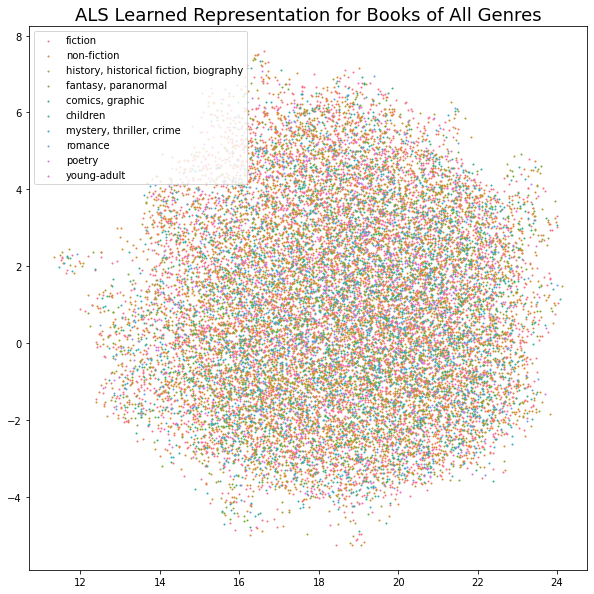

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df1.genre == g][:, 0], embedding[df1.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=1.))

plt.legend(temp, genres, loc='upper left', fontsize=10)

plt.title('ALS Learned Representation for Books of All Genres', fontsize=18);

### Visualization of genre *Mystery, Thriller, Crime* and *Children*

In [0]:
genres = ['mystery, thriller, crime', 'children']
df2 = df1[df1['genre'].isin(genres)]
print('There are {} books in genre Mystery, Thriller, Crime and Children.'.format(df2.shape[0]))

There are 2887 books in genre Mystery, Thriller, Crime and Children.


In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=200, min_dist=1.)
embedding = reducer.fit_transform(df2.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

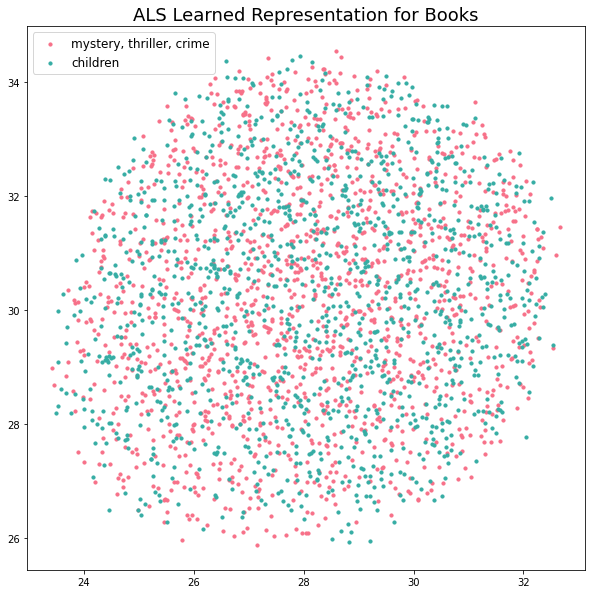

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df2.genre == g][:, 0], embedding[df2.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=10.))

plt.legend(temp, genres, loc='upper left', fontsize=12)

plt.title('ALS Learned Representation for Books', fontsize=18);

### Visualization of genre *Fiction* and *Non-Fiction*

In [0]:
genres = ['fiction', 'non-fiction']
df3 = df1[df1['genre'].isin(genres)]
print('There are {} books in genre Fiction and Non-Fiction.'.format(df3.shape[0]))

There are 11843 books in genre Fiction and Non-Fiction.


In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=100, min_dist=1.)
embedding = reducer.fit_transform(df3.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

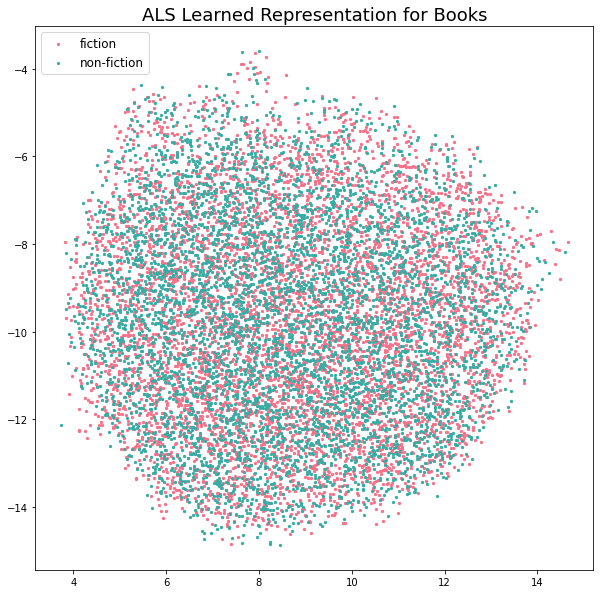

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df3.genre == g][:, 0], embedding[df3.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=5.))

plt.legend(temp, genres, loc='upper left', fontsize=12)

plt.title('ALS Learned Representation for Books', fontsize=18);

# ALS learned representation of books trained on 5% subsample data
### Data Preprocessing

In [0]:
df4 = pd.read_csv("exp_5_rank30.csv", index_col=0)
df4['features'] = df4['features'].apply(lambda x: x[1:-1].replace(' ','').split(','))
df4 = pd.concat([df4['genre'], pd.DataFrame(df4['features'].tolist()).astype(float)], axis=1)
print('There are {} books, each represented by vector of length {}.'.format(df4.shape[0], df4.shape[1]-1))

There are 70675 books, each represented by vector of length 30.


In [0]:
genres = df4.genre.unique().tolist()
genres

['non-fiction',
 'fiction',
 'mystery, thriller, crime',
 'children',
 'poetry',
 'comics, graphic',
 'fantasy, paranormal',
 'young-adult',
 'history, historical fiction, biography',
 'romance']

### Visualization of All Genres

In [0]:
# Subsample in order to fit umap
df5 = df4.sample(n=20000)

In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=50, min_dist=1.)
embedding = reducer.fit_transform(df5.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

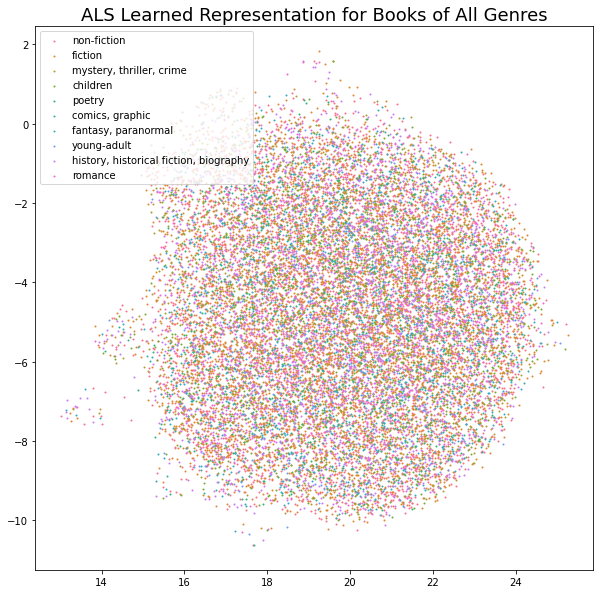

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df5.genre == g][:, 0], embedding[df5.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=1.))

plt.legend(temp, genres, loc='upper left', fontsize=10)

plt.title('ALS Learned Representation for Books of All Genres', fontsize=18);

### Visualization of genre *Mystery, Thriller, Crime* and *Children*

In [0]:
genres = ['mystery, thriller, crime', 'children']
df6 = df4[df4['genre'].isin(genres)]
print('There are {} books in genre Mystery, Thriller, Crime and Children.'.format(df6.shape[0]))

There are 10441 books in genre Mystery, Thriller, Crime and Children.


In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=100, min_dist=1.)
embedding = reducer.fit_transform(df6.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

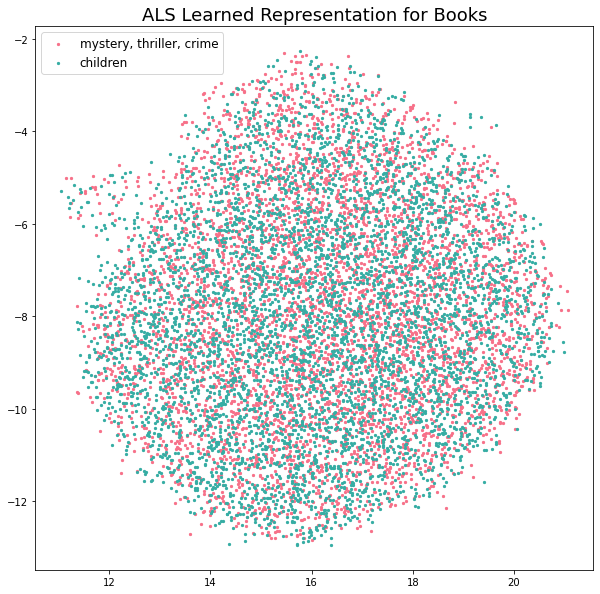

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df6.genre == g][:, 0], embedding[df6.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=5.))

plt.legend(temp, genres, loc='upper left', fontsize=12)

plt.title('ALS Learned Representation for Books', fontsize=18);

### Visualization of genre *Fiction* and *Non-Fiction*

In [0]:
genres = ['fiction', 'non-fiction']
df7 = df4[df4['genre'].isin(genres)]
print('There are {} books in genre Fiction and Non-Fiction.'.format(df7.shape[0]))

There are 37663 books in genre Fiction and Non-Fiction.


In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=10, min_dist=1.)
embedding = reducer.fit_transform(df7.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

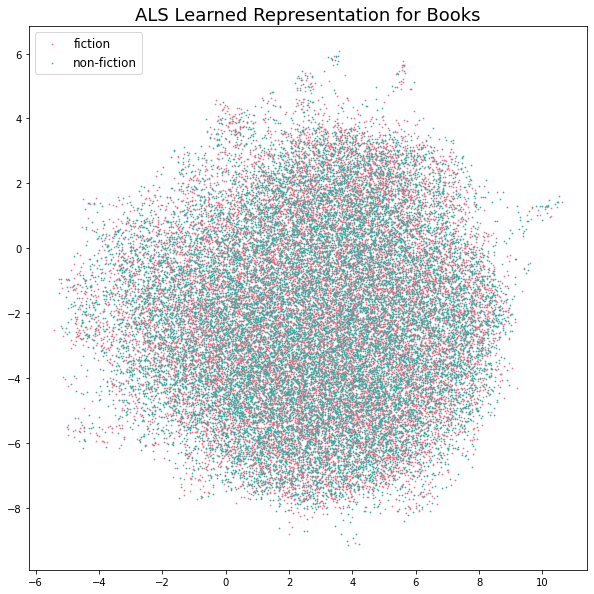

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df7.genre == g][:, 0], embedding[df7.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=.5))

plt.legend(temp, genres, loc='upper left', fontsize=12)

plt.title('ALS Learned Representation for Books', fontsize=18);

# ALS learned representation of books trained on 10% subsample data
### Data Preprocessing

In [0]:
df8 = pd.read_csv("exp_10_rank30.csv", index_col=0)
df8['features'] = df8['features'].apply(lambda x: x[1:-1].replace(' ','').split(','))
df8 = pd.concat([df8['genre'], pd.DataFrame(df8['features'].tolist()).astype(float)], axis=1)
print('There are {} books, each represented by vector of length {}.'.format(df8.shape[0], df8.shape[1]-1))

There are 109235 books, each represented by vector of length 30.


In [0]:
genres = df8.genre.unique().tolist()
genres

['non-fiction',
 'fiction',
 'mystery, thriller, crime',
 'children',
 'poetry',
 'comics, graphic',
 'fantasy, paranormal',
 'young-adult',
 'history, historical fiction, biography',
 'romance']

### Visualization of All Genres

In [0]:
# Subsample in order to fit umap
df9 = df8.sample(n=20000)

In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=50, min_dist=1.)
embedding = reducer.fit_transform(df9.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

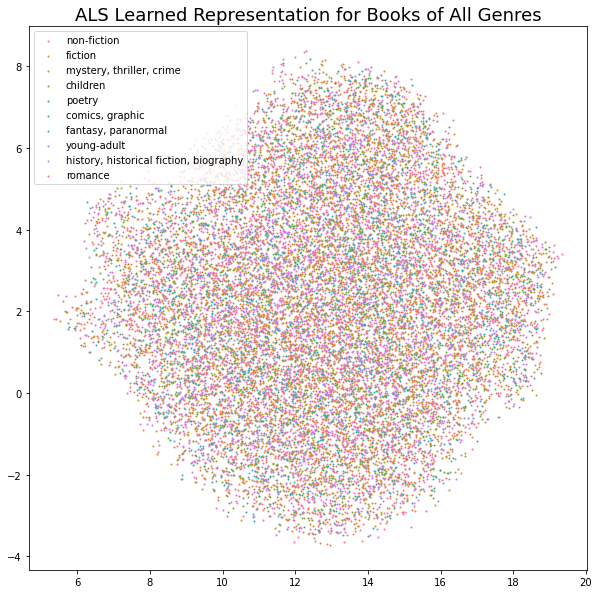

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df9.genre == g][:, 0], embedding[df9.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=1.))

plt.legend(temp, genres, loc='upper left', fontsize=10)

plt.title('ALS Learned Representation for Books of All Genres', fontsize=18);

### Visualization of genre *Mystery, Thriller, Crime* and *Children*

In [0]:
genres = ['mystery, thriller, crime', 'children']
df10 = df8[df8['genre'].isin(genres)]
print('There are {} books in genre Mystery, Thriller, Crime and Children.'.format(df10.shape[0]))

There are 16682 books in genre Mystery, Thriller, Crime and Children.


In [0]:
# fit umap
reducer = umap.UMAP(n_neighbors=50, min_dist=1.)
embedding = reducer.fit_transform(df10.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

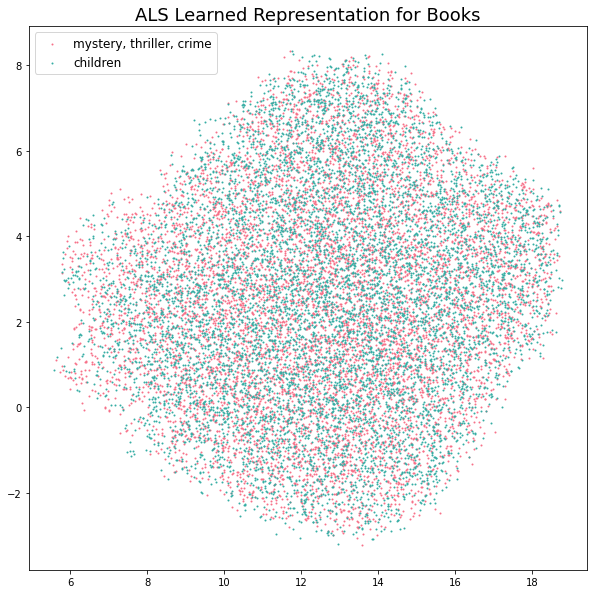

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df10.genre == g][:, 0], embedding[df10.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=1.))

plt.legend(temp, genres, loc='upper left', fontsize=12)

plt.title('ALS Learned Representation for Books', fontsize=18);

### Visualization of genre *History, Historical fiction, Biography* and *Fantasy, Paranormal*

In [0]:
genres = ['history, historical fiction, biography', 'fantasy, paranormal']
df11 = df8[df8['genre'].isin(genres)]
print('There are {} books in genre History, Historical Fiction, Biography and Fantasy, Paranormal.'.format(df11.shape[0]))

There are 21783 books in genre History, Historical Fiction, Biography and Fantasy, Paranormal.


In [0]:
# downsample to fit UMAP
df11 = df11.sample(n=20000)

# fit umap
reducer = umap.UMAP(n_neighbors=50, min_dist=1.)
embedding = reducer.fit_transform(df11.iloc[:,1:])
cmap = sns.color_palette("husl", len(genres))

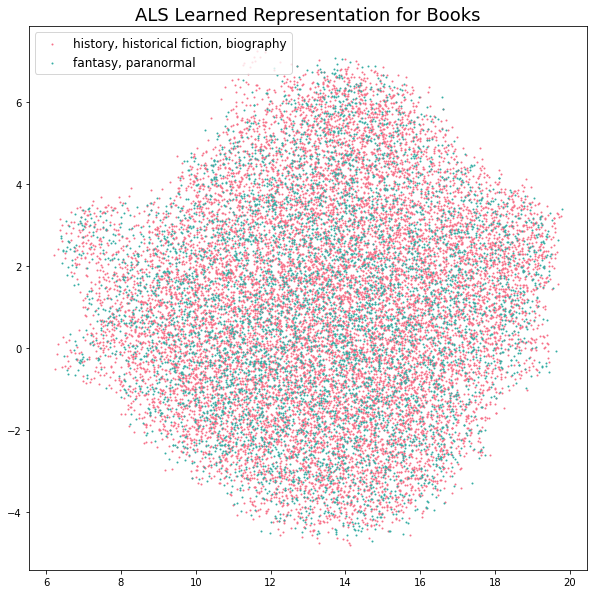

In [0]:
# plot
plt.figure(figsize=(10,10))
temp = []
for i in range(len(genres)):
    g = genres[i]
    temp.append(plt.scatter(embedding[df11.genre == g][:, 0], embedding[df11.genre == g][:, 1], c=np.array(cmap[i]).reshape(1,-1), s=1.))

plt.legend(temp, genres, loc='upper left', fontsize=12)

plt.title('ALS Learned Representation for Books', fontsize=18);